In [ ]:
import requests 
from bs4 import BeautifulSoup
import time
import random as rand 
import pandas as pd
import numpy as np

In [ ]:
review_dict = {'name':[],'date':[], 'rating':[], 'review':[]}
#review_dict = {'name':[], 'date':[], 'rating':[], 'review':[]}
for page in range(1,3): #Remember to update the number of pages 
    url = 'https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page='+str(page)
    user_agent = {'User-agent': 'Chrome/6.0.472.63'}
    response  = requests.get(url, headers = user_agent)
    time.sleep(rand.randint(1,3))
    soup = BeautifulSoup(response.text, 'html.parser')
    for review in soup.find_all('div', class_='review_content'):
        if review.find('div', class_='name') == None:
                       break 
        review_dict['name'].append(review.find('div', class_='name').find('a').text)
        review_dict['date'].append(review.find('div', class_='date').text)
        review_dict['rating'].append(review.find('div', class_='review_grade').find_all('div')[0].text)
        if review.find('span', class_='blurb blurb_expanded'):
            review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
        else:
            review_dict['review'].append(review.find('div', class_='review_body').find('span').text)

CP2077_reviews = pd.DataFrame(review_dict)

In [ ]:
CP2077_reviews = pd.DataFrame(review_dict)
CP2077_reviews.head(10)

,name,date,rating,review
0,Archmalice,"Dec 12, 2020",7,My review after 1.04: expected The Witcher 3 R...
1,Nowayback_,"Dec 12, 2020",1,"""We care about our games"" ""Next-Generation of ..."
2,BMGAMERPL,"Dec 11, 2020",0,This game is a SCAM! Dont buy this **** its Cy...
3,donniepurser,"Dec 12, 2020",0,"Terrible gameplay, stupid Ai, boring city, woo..."
4,azmaiulla,"Dec 12, 2020",0,This game is full of **** bug. you talk about ...
5,LinkinPark2000,"Dec 12, 2020",0,Biggest overhyped fail of all time? I think so...
6,dgk780,"Dec 11, 2020",0,"This was the worst game I've ever played, let ..."
7,cangeles,"Dec 11, 2020",3,Underwhelming. Beautiful but buggy game. Nothi...
8,Roadtonowhere,"Dec 12, 2020",0,"Empty, pointless waste of this that will be fo..."
9,CyberFail101,"Dec 12, 2020",1,"Empty lifeless open world, bad coding, extreme..."


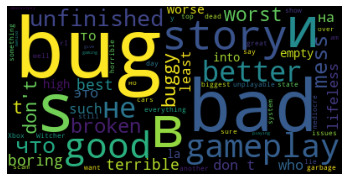

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
exclure_mots = ['it','in','then','who''could', 'if', 'the', 'is', 'le', 'this', 'that', 'there', 'no', 'we', 'us', 'most', 'of', 'a', 'what', 'to','they', 'not', 'year', 'even', 'was', 'all', 'with', 'like', 'get', 'at', 'look', 'just', 'your', 'from', 'as', 'than', 'more', 'an', 'have', 'do', 'how', 'really', 'on','game','juego','lo','too','una','are','so','much','can','graphic','NPC','play','but', 'open world','review','would','people','same','will','for','one','or','should','AI','open','months','feel','my','first','time','GTA','games','any','years','money','world','setting','thing','did','fix','when','after', 'by','make','settings','put','buy','because','yet','only','issue', 'be','ever','video','product','has','played','its','work','been','out','Ha','he','many','about','level','release','marketing','very','think','me','actually','B','you','optimization','He','reviews','had','dont','hours','driving','I','and','see','pc','character', 'console', 'full','car','never','performance','mission','their','NPCs','development','where','feels','run','then','every','released','up','lot','Cyberpunk','RPG','graphics','could','de','far','things','looks','other','fps','without','city','version','now','missions','CDPR','r','also','need','them','que','know','some','glitches','nothing','ps4','were']
text = CP2077_reviews['review'].values 
wordcloud = WordCloud(background_color = 'black', stopwords = exclure_mots, max_words = 70).generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

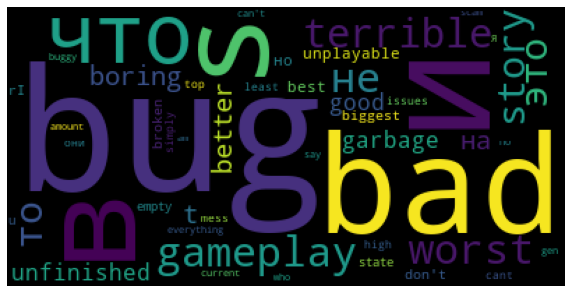

In [ ]:
exclure_mots = ['it','in','then','who''could', 'if', 'the', 'is', 'le', 'this', 'that', 'there', 'no', 'we', 'us', 'most', 'of', 'a', 'what', 'to','they', 'not', 'year', 'even', 'was', 'all', 'with', 'like', 'get', 'at', 'look', 'just', 'your', 'from', 'as', 'than', 'more', 'an', 'have', 'do', 'how', 'really', 'on','game','juego','lo','too','una','are','so','much','can','graphic','NPC','play','but', 'open world','review','would','people','same','will','for','one','or','should','AI','open','months','feel','my','first','time','GTA','games','any','years','money','world','setting','thing','did','fix','when','after', 'by','make','settings','put','buy','because','yet','only','issue', 'be','ever','video','product','has','played','its','work','been','out','Ha','he','many','about','level','release','marketing','very','think','me','actually','B','you','optimization','He','reviews','had','dont','hours','driving','I','and','see','pc','character', 'console', 'full','car','never','performance','mission','their','NPCs','development','where','feels','run','then','every','released','up','lot','Cyberpunk','RPG','graphics','could','de','far','things','looks','other','fps','without','city','version','now','missions','CDPR','r','also','need','them','que','know','some','glitches','nothing','ps4','were']
verybad = CP2077_reviews[CP2077_reviews['rating'] == '0']
text = verybad['review'].values 
wordcloud = WordCloud(background_color = 'black', stopwords = exclure_mots, max_words = 50).generate(str(text))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

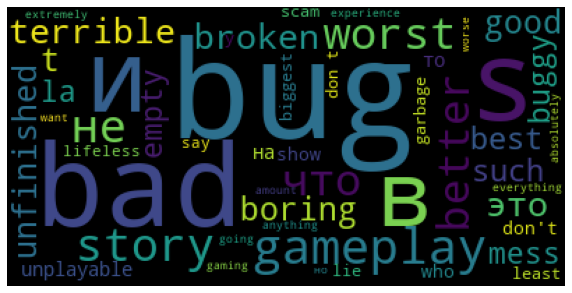

In [ ]:
exclure_mots = ['it','in','then','who''could', 'if', 'the', 'is', 'le', 'this', 'that', 'there', 'no', 'we', 'us', 'most', 'of', 'a', 'what', 'to','they', 'not', 'year', 'even', 'was', 'all', 'with', 'like', 'get', 'at', 'look', 'just', 'your', 'from', 'as', 'than', 'more', 'an', 'have', 'do', 'how', 'really', 'on','game','juego','lo','too','una','are','so','much','can','graphic','NPC','play','but', 'open world','review','would','people','same','will','for','one','or','should','AI','open','months','feel','my','first','time','GTA','games','any','years','money','world','setting','thing','did','fix','when','after', 'by','make','settings','put','buy','because','yet','only','issue', 'be','ever','video','product','has','played','its','work','been','out','Ha','he','many','about','level','release','marketing','very','think','me','actually','B','you','optimization','He','reviews','had','dont','hours','driving','I','and','see','pc','character', 'console', 'full','car','never','performance','mission','their','NPCs','development','where','feels','run','then','every','released','up','lot','Cyberpunk','RPG','graphics','could','de','far','things','looks','other','fps','without','city','version','now','missions','CDPR','r','also','need','them','que','know','some','glitches','nothing','ps4','were']
bad = CP2077_reviews[CP2077_reviews['rating'] < '3']
text = bad['review'].values 
wordcloud = WordCloud(background_color = 'black', stopwords = exclure_mots, max_words = 50).generate(str(text))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

In [ ]:
exclure_mots = ['it','in','then','who''could', 'if', 'the', 'is', 'le', 'this', 'that', 'there', 'no', 'we', 'us', 'most', 'of', 'a', 'what', 'to','they', 'not', 'year', 'even', 'was', 'all', 'with', 'like', 'get', 'at', 'look', 'just', 'your', 'from', 'as', 'than', 'more', 'an', 'have', 'do', 'how', 'really', 'on','game','juego','lo','too','una','are','so','much','can','graphic','NPC','play','but', 'open world','review','would','people','same','will','for','one','or','should','AI','open','months','feel','my','first','time','GTA','games','any','years','money','world','setting','thing','did','fix','when','after', 'by','make','settings','put','buy','because','yet','only','issue', 'be','ever','video','product','has','played','its','work','been','out','Ha','he','many','about','level','release','marketing','very','think','me','actually','B','you','optimization','He','reviews','had','dont','hours','driving','I','and','see','pc','character', 'console', 'full','car','never','performance','mission','their','NPCs','development','where','feels','run','then','every','released','up','lot','Cyberpunk','RPG','graphics','could','de','far','things','looks','other','fps','without','city','version','now','missions','CDPR','r','also','need','them','que','know','some','glitches','nothing','ps4','were']
average = CP2077_reviews[CP2077_reviews['rating'] >'3'[CP2077_reviews['rating'] <'6']]
text = average['review'].values 
wordcloud = WordCloud(background_color = 'white', stopwords = exclure_mots, max_words = 100).generate(str(text))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

TypeError: ignored

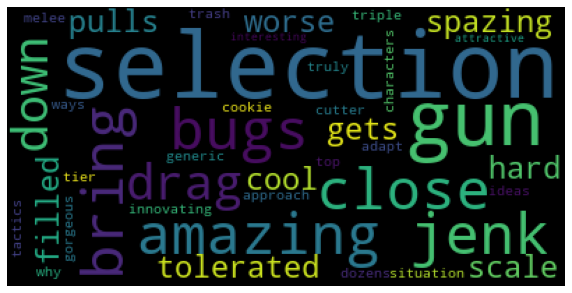

In [ ]:
exclure_mots = ['it','in','then','who''could', 'if', 'the', 'is', 'le', 'this', 'that', 'there', 'no', 'we', 'us', 'most', 'of', 'a', 'what', 'to','they', 'not', 'year', 'even', 'was', 'all', 'with', 'like', 'get', 'at', 'look', 'just', 'your', 'from', 'as', 'than', 'more', 'an', 'have', 'do', 'how', 'really', 'on','game','juego','lo','too','una','are','so','much','can','graphic','NPC','play','but', 'open world','review','would','people','same','will','for','one','or','should','AI','open','months','feel','my','first','time','GTA','games','any','years','money','world','setting','thing','did','fix','when','after', 'by','make','settings','put','buy','because','yet','only','issue', 'be','ever','video','product','has','played','its','work','been','out','Ha','he','many','about','level','release','marketing','very','think','me','actually','B','you','optimization','He','reviews','had','dont','hours','driving','I','and','see','pc','character', 'console', 'full','car','never','performance','mission','their','NPCs','development','where','feels','run','then','every','released','up','lot','Cyberpunk','RPG','graphics','could','de','far','things','looks','other','fps','without','city','version','now','missions','CDPR','r','also','need','them','que','know','some','glitches','nothing','ps4','were']
good = CP2077_reviews[CP2077_reviews['rating'] > '7']
text = good['review'].values 
wordcloud = WordCloud(background_color = 'black', stopwords = exclure_mots, max_words = 40).generate(str(text))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

In [ ]:
for word in bad['review']:
  word.value_counts()[:10]

AttributeError: ignored

In [ ]:
#feel = CP2077_reviews['review']
anger = CP2077_reviews['review' == 'terrible', 'worst','scam', 'broken','worse','trash', 'garbage']
disappointement = CP2077_reviews['review' == 'boring', 'lifeless','lie','buggy']
joy = CP2077_reviews['review' == 'love', 'amazing', 'gorgeous','cool','top']